In [1]:
import selenium 
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')

In [2]:
driver=webdriver.Chrome(r"C:/Users/Lenovo/Downloads/chromedriver_win32/chromedriver.exe")

## 1. Write a python program which searches all the product under a particular product from www.amazon.in. The product to be searched will be taken as input from user. For e.g. If user input is ‘guitar’. Then search for guitars.

In [3]:
driver.get('https://www.amazon.in/')
search_guitar=driver.find_element_by_id("twotabsearchtextbox")
search_guitar.send_keys("guiter")
search_btn=driver.find_element_by_id("nav-search-submit-button")
search_btn.click()

## 2. In the above question, now scrape the following details of each product listed in first 3 pages of your search results and save it in a data frame and csv. In case if any product has less than 3 pages in search results then scrape all the products available under that product name. Details to be scraped are: "Brand Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and “Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [4]:
url="https://www.amazon.in/s?k=guiter&ref=nb_sb_noss"

In [5]:
#create an empty list
brand_name=[]
product_name=[]
price=[]
return_exchange=[]
expected_delivery=[]
availability=[]
product_url=[]

start=0
end=3

for i in range(start,end):
    
    brand=driver.find_elements_by_xpath("//span[@class='a-size-base-plus a-color-base a-text-normal']")
    for j in brand:
        if j.text is None :
            brand_name.append("--") 
        else:
            brand_name.append(j.text)
        
    pricee=driver.find_elements_by_xpath("//span[@class='a-price-whole']")
    for j in pricee:
        if j.text is None :
            price.append("--") 
        else:
            price.append(j.text)
        
    """re_ex=driver.find_elements_by_xpath("a[@class='a-size-small a-link-normal a-text-normal']/span/div[1]")
    for l in re_ex:
        return_exchange.append(l.text)
      """  
    ex_delivery=driver.find_elements_by_xpath("//span[@class='a-color-base a-text-bold']")
    for j in ex_delivery:
        if j.text is None :
            expected_delivery.append("--") 
        else:
            expected_delivery.append(j.text)
        
    available=driver.find_elements_by_xpath("//span[@class='a-size-base a-color-price']")
    for j in available:
        if j.text is None :
            availability.append("--") 
        else:
            availability.append(j.text)
        
    pr_url=driver.find_elements_by_xpath("//a[@class='a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal']")
    for j in pr_url:
        if j.text is None :
            product_url.append("--") 
        else:
            product_url.append(j.get_attribute('href'))
        
    nxt_button=driver.find_elements_by_xpath("//a[@class='s-pagination-item s-pagination-button']")#scraping the list of buttons from the page
    try:
        driver.get(nxt_button[1].get_attribute('href'))#getting the link from the list for next page
    except:
        driver.get(nxt_button[0].get_attribute('href'))

print(len(brand_name),len(price),len(expected_delivery),len(availability),len(product_url))


168 164 155 25 168


In [6]:
for i in range(8,147):
    availability.insert(i,'-')

In [7]:
#creating a dataframe
df=pd.DataFrame({'Brand':brand_name[:96],
                'Price':price[:96],
                 'Availability':availability[0:96],
                'Expected Delivery':expected_delivery[:96],
                'Product Url':product_url[0:96]})
#printing dataframe
df.to_csv('guitar')
print(df)

                                                Brand   Price  \
0   Juarez Acoustic Guitar, 38 Inch Curved Body Cu...   6,499   
1   Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...   6,499   
2   Intern INT-38C Acoustic Guitar Kit, With Bag, ...   6,799   
3   Hovner 215 Black F-Cut Rosewood Fretboard Acou...   2,190   
4   Intern 38C Cutaway Design Black Acoustic Guita...   2,649   
..                                                ...     ...   
91  Yamaha FS100C Acoustic Guitar Concert body Wit...  12,999   
92  Kadence Astro Man Electric Guitar combo with (...   6,823   
93    Yamaha F310, 6-Strings Acoustic Guitar, Natural  30,490   
94  Yamaha PAC212VQM Electric Guitar (Tobacco Brow...   5,299   
95                 JUAREZ Arpeggio Guitar JRB40LN-3TS   7,400   

             Availability     Expected Delivery  \
0   Only 2 left in stock.  Wednesday, January 5   
1   Only 1 left in stock.    Tuesday, January 4   
2   Only 1 left in stock.   Saturday, January 8   
3   Only 2 left

## 3. Write a python program to access the search bar and search button on images.google.com and scrape 10 images each for keywords ‘fruits’, ‘cars’ and ‘Machine Learning’, ‘Guitar’, ‘Cakes’.

In [8]:
driver.get("http://images.google.com")
search_image=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_image.send_keys("fruits")
search_btn=driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_btn.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
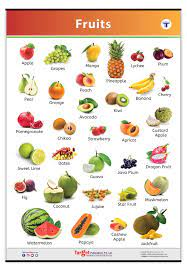
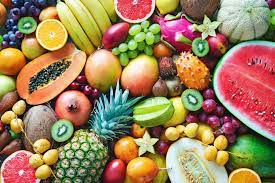
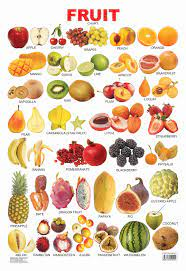
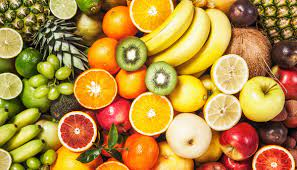
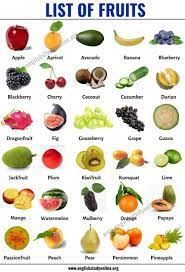
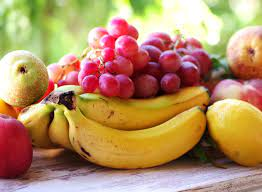
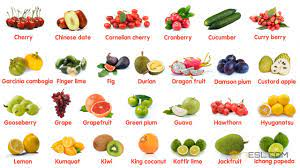
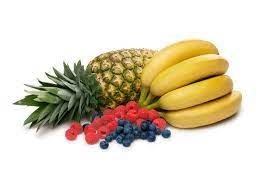
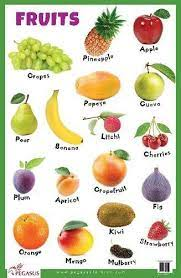
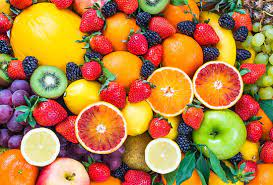

In [9]:
url="https://www.google.com/search?q=fruits&tbm=isch&source=hp&biw=1034&bih=620&ei=IgjLYcP_A4ri2roP5sS5-A8&iflsig=ALs-wAMAAAAAYcsWMpNymZNSO5JDx7WuRsKTPmjtspv9&ved=0ahUKEwjDmOemxIb1AhUKsVYBHWZiDv8Q4dUDCAY&oq=fruits&gs_lcp=CgNpbWcQDFAAWB5gaWgAcAB4AIABAIgBAJIBAJgBAKABAaoBC2d3cy13aXotaW1n&sclient=img"
driver.get(url)

img=[]
image=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
for i in image:
    img.append(i.get_attribute('src'))
img[:10]

In [10]:
driver.get("http://images.google.com")
search_image=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_image.send_keys("car")
search_btn=driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_btn.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
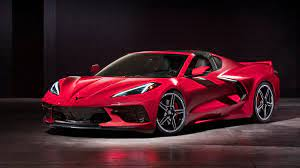
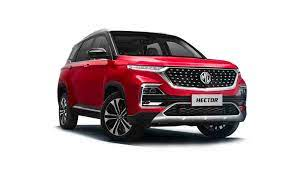
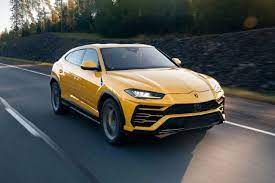
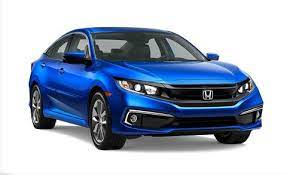
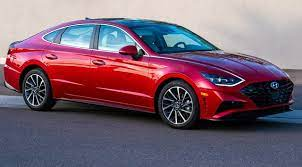
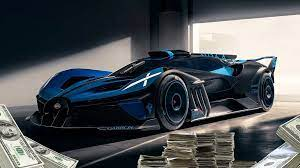
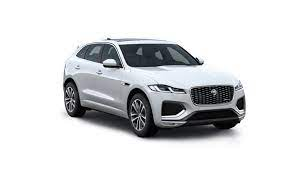
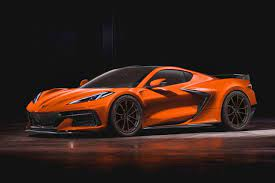
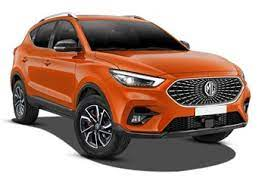
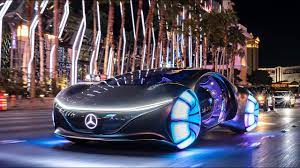

In [11]:
url="https://www.google.com/search?q=car&tbm=isch&source=hp&biw=479&bih=575&ei=QwrLYbXDGrem2roP5Iar8A8&iflsig=ALs-wAMAAAAAYcsYU85Kn5BLYTBQj8amYk3HogZVWbwo&ved=0ahUKEwj18O2qxob1AhU3k1YBHWTDCv4Q4dUDCAY&oq=car&gs_lcp=CgNpbWcQDFAAWB1ghQFoAHAAeACAAQCIAQCSAQCYAQCgAQGqAQtnd3Mtd2l6LWltZw&sclient=img"
driver.get(url)

img1=[]
image=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
for i in image:
    img1.append(i.get_attribute('src'))
img1[:10]

In [12]:
driver.get("http://images.google.com")
search_image=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_image.send_keys("Machine Learning")
search_btn=driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_btn.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
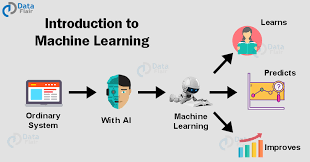
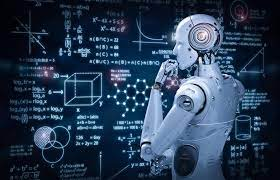
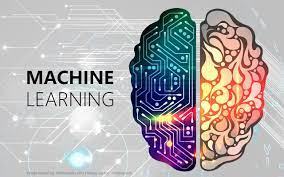
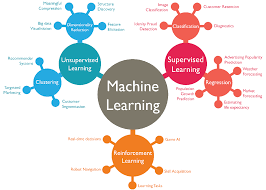
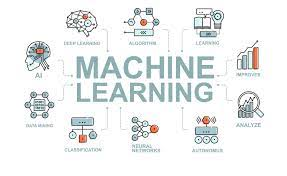
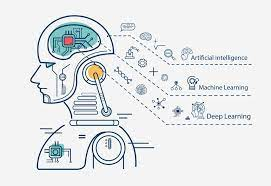
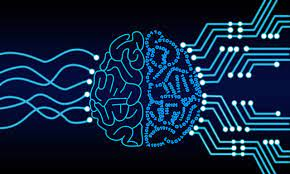
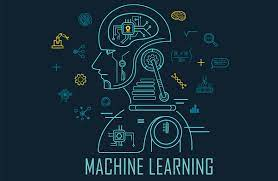
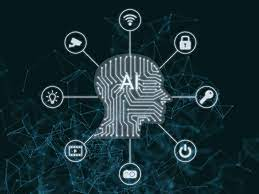
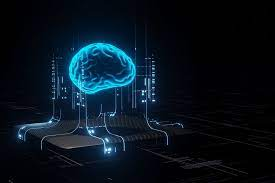

In [13]:
url="https://www.google.com/search?q=Machine+Learning&tbm=isch&source=hp&biw=1034&bih=575&ei=XizLYePTE9Dk2roPkPOI-A8&iflsig=ALs-wAMAAAAAYcs6bqqU_R7upckLoJJr21ixMuLqA9ho&ved=0ahUKEwjj-oju5ob1AhVQslYBHZA5Av8Q4dUDCAY&oq=Machine+Learning&gs_lcp=CgNpbWcQDFAAWFFgpAFoAHAAeACAAQCIAQCSAQCYAQCgAQGqAQtnd3Mtd2l6LWltZw&sclient=img"
driver.get(url)

img2=[]
image=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
for i in image:
    img2.append(i.get_attribute('src'))
img2[:10]

In [14]:
driver.get("http://images.google.com")
search_image=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_image.send_keys("guitar")
search_btn=driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_btn.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTA_ofepmHsYt-ErSNXQAWHRfxp0LxwNEYDaQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSOM-wnHPTBckO5ldbvE4MTLPyotKsxFvBiQA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTTCUycM83rmzg8FhqrhqSpNh5IqkY5nCPs4A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT4zfJEAxKO1UcI9mZk4xFZlTEJxj6mHLn9Zg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQU0AcKQwqpgt_HhutfXRwERj2l2rtOMmetVQ&usqp=CAU',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
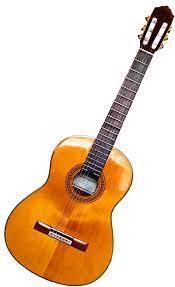
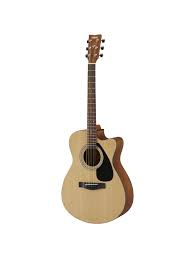
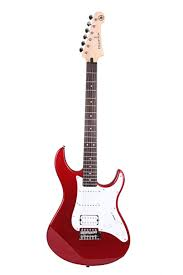
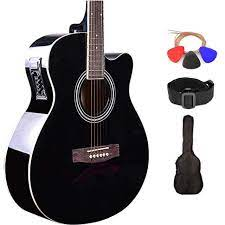
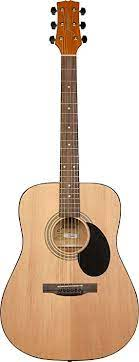
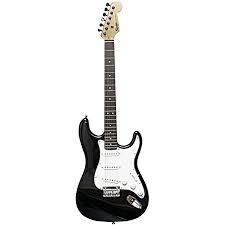
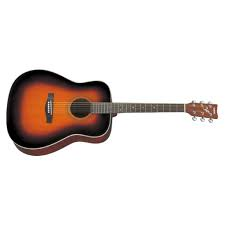
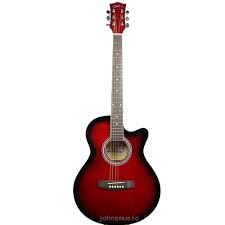
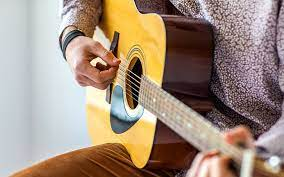
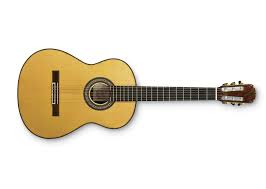
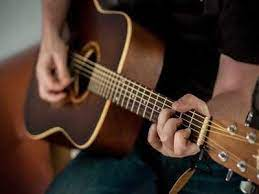
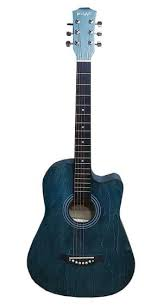
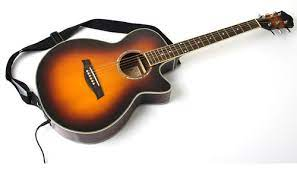
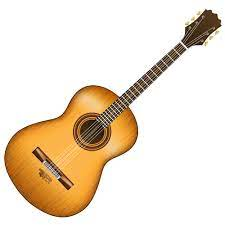
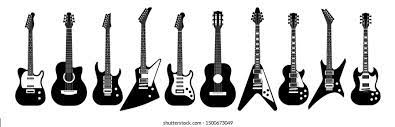
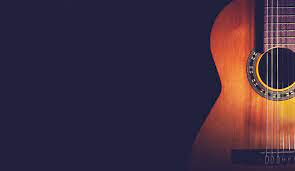
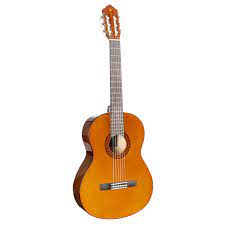
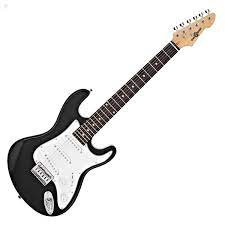
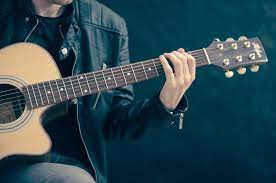
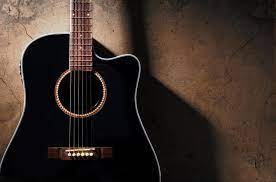

In [17]:
import requests

url="https://www.google.com/search?q=guitar&tbm=isch&source=hp&biw=479&bih=575&ei=Jy3LYcSyL8_n2roPsda3kAE&iflsig=ALs-wAMAAAAAYcs7NyDN6NZdBzf7IJL3gy2gGyWAwght&ved=0ahUKEwiE4pDO54b1AhXPs1YBHTHrDRIQ4dUDCAY&oq=guitar&gs_lcp=CgNpbWcQDFAAWEBg0gFoAHAAeACAAQCIAQCSAQCYAQCgAQGqAQtnd3Mtd2l6LWltZw&sclient=img"
driver.get(url)

img2=[]
image=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
for i in image:
    img2.append(i.get_attribute('src'))
img2


In [18]:
driver.get("http://images.google.com")
search_image=driver.find_element_by_xpath("//input[@class='gLFyf gsfi']")
search_image.send_keys("cakes")
search_btn=driver.find_element_by_xpath("//span[@class='z1asCe MZy1Rb']")
search_btn.click()




['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
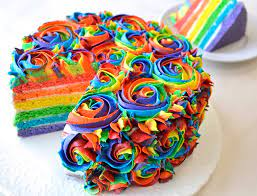
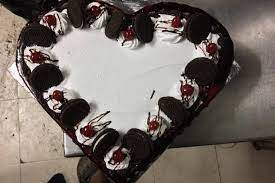
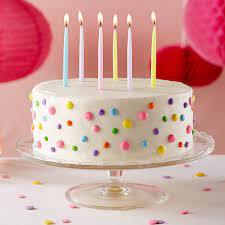
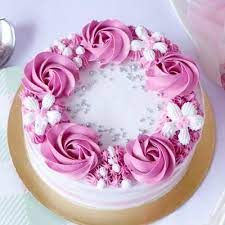
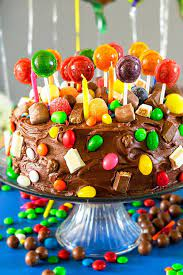
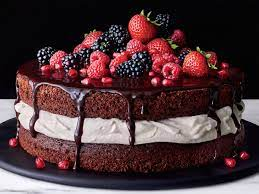
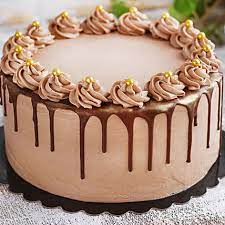
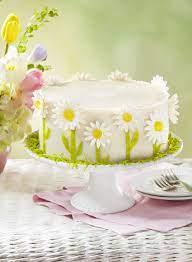
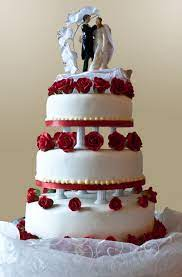
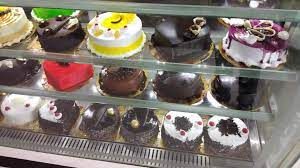

In [19]:
url="https://www.google.com/search?q=cakes&tbm=isch&source=hp&biw=479&bih=575&ei=0S7LYbmVA7bk2roP5tqH8A8&iflsig=ALs-wAMAAAAAYcs84UcZZzc0CSoSjivEvTU5-wCxXajD&ved=0ahUKEwj5wfWY6Yb1AhU2slYBHWbtAf4Q4dUDCAY&oq=cakes&gs_lcp=CgNpbWcQDFAAWC5gvQFoAHAAeACAAQCIAQCSAQCYAQCgAQGqAQtnd3Mtd2l6LWltZw&sclient=img"
driver.get(url)

img3=[]
image=driver.find_elements_by_xpath("//img[@class='rg_i Q4LuWd']")
for i in image:
    img3.append(i.get_attribute('src'))
img3[:10]

## 4. Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, “Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the details is missing then replace it by “- “. Save your results in a dataframe and CSV.

In [20]:
url="http://www.flipkart.com"
driver.get(url)

In [21]:
#locating the search bar
search_bar=driver.find_element_by_class_name("_3704LK")
search_bar.send_keys('smartphone')

#locating the button and clicking it toh search for sunglasses
button=driver.find_element_by_class_name('L0Z3Pu')
button.click()

ElementClickInterceptedException: Message: element click intercepted: Element <button class="L0Z3Pu" type="submit">...</button> is not clickable at point (556, 28). Other element would receive the click: <div class="_36HLxm col col-3-5">...</div>
  (Session info: chrome=96.0.4664.110)
Stacktrace:
Backtrace:
	Ordinal0 [0x01226903+2517251]
	Ordinal0 [0x011BF8E1+2095329]
	Ordinal0 [0x010C2848+1058888]
	Ordinal0 [0x010F3509+1258761]
	Ordinal0 [0x010F1868+1251432]
	Ordinal0 [0x010EF65D+1242717]
	Ordinal0 [0x010EE4A8+1238184]
	Ordinal0 [0x010E4037+1196087]
	Ordinal0 [0x011064D3+1336531]
	Ordinal0 [0x010E3A36+1194550]
	Ordinal0 [0x011065BA+1336762]
	Ordinal0 [0x01115BBF+1399743]
	Ordinal0 [0x0110639B+1336219]
	Ordinal0 [0x010E27A7+1189799]
	Ordinal0 [0x010E3609+1193481]
	GetHandleVerifier [0x013B5904+1577972]
	GetHandleVerifier [0x01460B97+2279047]
	GetHandleVerifier [0x012B6D09+534521]
	GetHandleVerifier [0x012B5DB9+530601]
	Ordinal0 [0x011C4FF9+2117625]
	Ordinal0 [0x011C98A8+2136232]
	Ordinal0 [0x011C99E2+2136546]
	Ordinal0 [0x011D3541+2176321]
	BaseThreadInitThunk [0x759BFA29+25]
	RtlGetAppContainerNamedObjectPath [0x77637A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77637A6E+238]


In [ ]:
url="https://www.flipkart.com/search?q=smartphonesmartphone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
driver.get(url)

phone_name=[]
ram_rom=[]
s_camera=[]
size=[]
battery_capacity=[]
price=[]
product_url=[]


pn=driver.find_elements_by_xpath("//div[@class='_4rR01T']")
for i in pn:
    phone_name.append(i.text)
RAM_ROM=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[1]")
for i in RAM_ROM:
    ram_rom.append(i.text)
displaysize=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[2]")
for i in displaysize:
    size.append(i.text)
s_c=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[3]")
for i in s_c:
    s_camera.append(i.text)
b_c=driver.find_elements_by_xpath("//ul[@class='_1xgFaf']/li[4]")
for i in b_c:
    battery_capacity.append(i.text)
pr=driver.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']")
for i in pr:
    price.append(i.text)
p_url=driver.find_elements_by_xpath("//a[@class='_1fQZEK']")
for i in p_url:
    product_url.append(i.get_attribute('href'))

print(len(phone_name),len(ram_rom),len(size),len(s_camera),len(battery_capacity),len(price),len(product_url))
df=pd.DataFrame({'Brand|PhoneName|color':phone_name,
                 'RAM | ROM ':ram_rom,
                 'Display Size':size,
                 'Primary | Secondary Camera':s_camera,
                 'Battery Capacity':battery_capacity,
                 'Price':price,
                 'Product URL':product_url
})
df.to_csv('C:/Users/Lenovo/Desktop/FlipRobo_Intern_22/smartphone.csv')
print(df)

In [22]:
from tqdm import tqdm_notebook as tqdmn

## 5. Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps.

In [23]:
url="https://www.google.com/maps"
driver.get(url)

In [24]:
search_city=driver.find_element_by_xpath("//input[@class='tactile-searchbox-input']")
search_city.send_keys("Mahesana")
search_btn=driver.find_element_by_xpath("//button[@class='nhb85d-BIqFsb']")
search_btn.click()

In [26]:
url="https://www.google.com/maps/@22.4168315,71.319437,7z"
driver.get(url)
Url_With_Coordinates=[]
Url_With_Coordinates.append(driver.find_element_by_css_selector('meta[itemprop=image]').get_attribute('content'))

In [27]:
Url_With_Coordinates

['https://maps.google.com/maps/api/staticmap?center=22.4168315%2C71.319437&zoom=7&size=256x256&language=en&sensor=false&client=google-maps-frontend&signature=p9oqEaF6Va5bQegZRsqh8jNM2MY']

## 6. Write a program to scrap details of all the funding deals for second quarter (i.e Jan 21 – March 21) from trak.in.

In [28]:
url="https://trak.in/india-startup-funding-investment-2015/"
driver.get(url)

In [31]:
march=[]
Ma=driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-56 dataTable no-footer']")
for i in Ma:
    march.append(i.text)  
febuary=[]
feb=driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-55 dataTable no-footer']")
for i in feb:
    febuary.append(i.text) 
january=[]
Jan=driver.find_elements_by_xpath("//table[@class='tablepress tablepress-id-54 dataTable no-footer']")
for i in Jan:
    january.append(i.text) 

In [32]:
df=pd.DataFrame({'January 2021':january,
                'February 2021':febuary,
                'March 2021':march})
print(df[:10])

                                        January 2021  \
0  Sr. No. Date (dd/mm/yyyy) Startup Name Industr...   
1  1 15/01/2021 Digit Insurance Financial Service...   

                                       February 2021  \
0  Sr. No. Date (dd/mm/yyyy) Startup Name Industr...   
1  1 11/02/2021 Doubtnut Edu Tech E-Learning Plat...   

                                          March 2021  
0  Sr. No. Date (dd/mm/yyyy) Startup Name Industr...  
1  1 04/03/2021 DealShare E-commerce Online shopp...  


## 7. Write a program to scrap all the available details of best gaming laptops from digit.in.

In [33]:
url="https://www.digit.in/"
driver.get(url)

In [34]:
search_btn=driver.find_element_by_class_name("search")
search_btn.click()
search_=driver.find_element_by_id("globalPageSearchText")
search_.send_keys("gaming laptop")
#search_.submit()

In [35]:
url="https://www.digit.in/search/?keyword=gaming%20laptop"
driver.get(url)
Model_name=[]
brand=[]
updated=[]
price=[]
link=[]

MN=driver.find_elements_by_xpath("//div[@class='searchProduct-desc']")
for i in MN:
    Model_name.append(i.text)
update=driver.find_elements_by_xpath("//div[@class='searchPage']/span")
for i in update:
    updated.append(i.text)
df=pd.DataFrame({'Model Name':Model_name,
                'Updated Date':updated})
df

,Model Name,Updated Date
0,ASUS TUF Gaming A15 Ryzen 9 4900H,"Nov 08, 2021"
1,ASUS GX501 Zephyrus Gaming Laptop,"Nov 08, 2021"
2,Acer Predator Triton 700,"Apr 09, 2019"
3,ASUS TUF Gaming FX505DD-AL185T,"Apr 19, 2021"
4,Dell G15 Gaming Ryzen 5 6-core-5600H (2021),"Dec 06, 2021"
5,Alienware M14x,"Mar 28, 2021"
6,Asus TUF Gaming A15,"Nov 08, 2021"
7,HP Pavilion Gaming 15 Core i5,"Nov 22, 2021"
8,MSI GE60 2PE,"Apr 09, 2019"
9,MSI Gaming GL63 9RDS-853IN,"Feb 10, 2020"


## 8. Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.

In [36]:
url="http://www.forbes.com/"
driver.get(url)

In [37]:
url="https://www.forbes.com/billionaires/"
driver.get(url)

rank=[]
name=[]
net_worth=[]
age=[]
citizen=[]
source=[]
industry=[]

rankk=driver.find_elements_by_xpath("//div[@class='rank']")
for i in rankk:
    if i.text is None:
        rank.append('--')
    else:
        rank.append(i.text)
nam=driver.find_elements_by_xpath("//div[@class='personName']")
for i in nam:
    if i.text is None:
        name.append('--')
    else:
        name.append(i.text)
n_w=driver.find_elements_by_xpath("//div[@class='netWorth']")
for i in n_w:
    if i.text is None:
        net_worth.append('--')
    else:
        net_worth.append(i.text)
ag=driver.find_elements_by_xpath("//div[@class='age']")
for i in ag:
    if i.text is None:
        age.append('--')
    else:
        age.append(i.text)
citi=driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
for i in citi:
    if i.text is None:
        citizen.append('--')
    else:
        citizen.append(i.text)
src=driver.find_elements_by_xpath("//div[@class='source']")
for i in src:
    if i.text is None:
        source.append('--')
    else:
        source.append(i.text)
ind=driver.find_elements_by_xpath("//div[@class='category']/div")
for i in ind:
    if i.text is None:
        industry.append('--')
    else:
        industry.append(i.text)

In [38]:
print(len(rank),len(name),len(net_worth),len(age),len(citizen),len(source),len(industry))

200 200 200 200 200 200 200


In [39]:
df=pd.DataFrame({'Rank':rank,
                 'Name':name,
                 'Net Worth':net_worth,
                 'Age':age,
                 'CitizenShip':citizen,
                 'Source':source,
                 'Industry':industry
                })
df

,Rank,Name,Net Worth,Age,CitizenShip,Source,Industry
0,1.,Jeff Bezos,$177 B,,United States,Amazon,
1,2.,Elon Musk,$151 B,,United States,"Tesla, SpaceX",
2,3.,Bernard Arnault & family,$150 B,,France,LVMH,
3,4.,Bill Gates,$124 B,,United States,Microsoft,
4,5.,Mark Zuckerberg,$97 B,,United States,Facebook,
...,...,...,...,...,...,...,...
195,195.,Harry Triguboff,$11.2 B,,Australia,real estate,
196,197.,Leonid Fedun & family,$11.1 B,,Russia,oil,
197,197.,Eyal Ofer,$11.1 B,,Israel,"real estate, shipping",
198,197.,Evan Spiegel,$11.1 B,,United States,Snapchat,


## 9. Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted from any YouTube Video.

In [ ]:
url="http://www.youtube.com/"
driver.get(url)

In [ ]:
search=driver.find_element_by_xpath("//input[@id='search']")
search.send_keys("kishor kumar")
search_btn=driver.find_element_by_xpath("//button[@class='style-scope ytd-searchbox']")
search_btn.click()

In [ ]:
url="https://www.youtube.com/watch?v=Hizdc4XVJ1E"
driver.get(url)

comment=[]
comment_upvote=[]
time=[]

totalcomments= len(driver.find_elements_by_xpath("""//*[@id="content-text"]"""))
         
if totalcomments < 50:
    index= totalcomments
else:
    index= 50            
    ccount = 0
    while ccount < index: 
        try:
            comment = driver.find_elements_by_xpath('//*[@id="content-text"]')[ccount].text
        except:
            comment = ""
        try:
            authors = driver.find_elements_by_xpath('//a[@id="author-text"]/span')[ccount].text
        except:
            authors = ""
        try:
            comment_posted = driver.find_elements_by_xpath('//*[@id="published-time-text"]/a')[ccount].text
        except:
            comment_posted = ""
        try:
            replies = driver.find_elements_by_xpath('//*[@id="more-text"]')[ccount].text                    
            if replies =="View reply":
                replies= 1
            else:
                replies =replies.replace("View ","")
                replies =replies.replace(" replies","")
        except:
            replies = ""
        try:
            upvotes = driver.find_elements_by_xpath('//*[@id="vote-count-middle"]')[ccount].text
        except:
            upvotes = ""
                        
        youtube_dict['url'] = href[tcount]
        youtube_dict['link_title'] = title[tcount]
        youtube_dict['channel'] = channel[tcount]
        youtube_dict['no_of_views'] = numview[tcount]
        youtube_dict['time_uploaded'] =  postdate[tcount]
        youtube_dict['comment'] = comment
        youtube_dict['author'] = authors
        youtube_dict['comment_posted'] = comment_posted
        youtube_dict['no_of_replies'] = replies
        youtube_dict['upvotes'] = upvotes            

In [ ]:
print(len(comment))

## 10. Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in “London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, overall reviews, privates from price, dorms from price, facilities and property description.

In [40]:
url="https://www.hostelworld.com/s?q=London,%20England&country=England&city=London&type=city&id=3&from=2022-01-03&to=2022-01-06&guests=2&page=1"
driver.get(url)

In [41]:
H_name=[]
distance=[]
rating=[]
total_review=[]
overall_review=[]
privatesprice=[]
dormsprice=[]
facility=[]
desc=[]

name=driver.find_elements_by_xpath("//h2[@class='title title-6']")
for i in name:
    H_name.append(i.text)
dist=driver.find_elements_by_xpath("//span[@class='description']")
for i in dist:
    distance.append(i.text)
rat=driver.find_elements_by_xpath("//div[@class='score orange big']")
rat1=driver.find_elements_by_xpath("//div[@class='score gray big']")
for i in rat:
    rating.append(i.text)
for j in rat1:
    rating.append(j.text)
total=driver.find_elements_by_xpath("//div[@class='reviews']")
for i in total:
    total_review.append(i.text)
overall=driver.find_elements_by_xpath("//div[@class='keyword']/span")
for i in overall:
    overall_review.append(i.text)
dec=driver.find_elements_by_xpath("//div[@class='rating-factors prop-card-tablet rating-factors small']")
for i in dec:
    desc.append(i.text)
fac=driver.find_elements_by_xpath("//div[@class='facilities-label facilities']")
for i in fac:
    facility.append(i.text)
pp=driver.find_elements_by_xpath("//a[@class='prices']/div[1]/div")
pp1=driver.find_elements_by_xpath("//p[@class='no-price body-3 no-privates']")
dp=driver.find_elements_by_xpath("//div[@class='price title-5']")
for i in pp:
    privatesprice.append(i.text)

for i in dp:
    if i is None:
        dormsprice.append('--')
    else:
        dormsprice.append(i.text)

In [42]:
print(len(H_name),len(distance),len(rating),len(total_review),len(overall_review),len(privatesprice),len(dormsprice),len(facility),len(desc))

30 30 30 30 31 23 52 30 30


In [43]:
df=pd.DataFrame({'Hostel Name':H_name[:23],
     'Distance': distance[:23],
     'Rating':rating[:23],
     'Total Review':total_review[:23],
     'Overall Review':overall_review[:23],
     'Private Price':privatesprice[:23],
      'Domestic Price':dormsprice[:46:2],
     'Facility':facility[:23],
     'Description':desc[:23]})

In [44]:
df

,Hostel Name,Distance,Rating,Total Review,Overall Review,Private Price,Domestic Price,Facility,Description
0,Mornington Camden,Hostel - 4.1km from city centre,8.3,44 Total Reviews,Fabulous,Rs3801,Rs2593,Free WiFi,Perfect Location\nSuperb Staff\nFantastic Clea...
1,Smart Russell Square Hostel,Hostel - 2.6km from city centre,6.7,9563 Total Reviews,Fabulous,Rs14783,Rs1133,Free WiFi\nFollows Covid-19 sanitation guidance,Perfect Location\nBrilliant Staff\nAwesome Cle...
2,Smart Camden Inn Hostel,Hostel - 4.4km from city centre,8.4,2732 Total Reviews,Good,Rs2329,Rs14783,Free WiFi\nFollows Covid-19 sanitation guidance,Perfect Location\nSuperb Staff\nExcellent Clea...
3,Selina Camden,Hostel - 5.5km from city centre,9.1,13 Total Reviews,Fabulous,Rs5054,Rs2329,Free WiFi,Perfect Location\nSuperb Staff\nFantastic Clea...
4,Queen Elizabeth Chelsea,Hostel - 5.7km from city centre,7.5,3212 Total Reviews,Superb,Rs3800.9 Rs3421,Rs5054,Free WiFi,Perfect Location\nSuperb Staff\nAwesome Cleanl...
5,Pickwick Hall,Hostel - 2.3km from city centre,9.0,2273 Total Reviews,Very Good,Rs7278,Rs1361.31 Rs1225,Free Breakfast,Perfect Location\nSuperb Staff\nFantastic Clea...
6,New Cross Inn Hostel,Hostel - 6.1km from city centre,7.4,1047 Total Reviews,Superb,Rs6065,Rs7278,Free WiFi\nFree Breakfast,Wonderful Location\nMarvellous Staff\nAwesome ...
7,No.8 Willesden Hostel London,Hostel - 10km from city centre,7.5,4631 Total Reviews,Very Good,Rs6234,Rs6065,Free WiFi\nFollows Covid-19 sanitation guidance,Wonderful Location\nSuperb Staff\nAwesome Clea...
8,Safestay London Elephant & Castle,Hostel - 1.7km from city centre,7.9,4021 Total Reviews,Very Good,Rs5358,Rs6234,Free WiFi\nFollows Covid-19 sanitation guidance,Perfect Location\nMarvellous Staff\nExcellent ...
9,Barmy Badger Backpackers,Hostel - 5.5km from city centre,9.3,1687 Total Reviews,Very Good,Rs6227,Rs652,Free WiFi\nFree Breakfast,Perfect Location\nSuperb Staff\nFantastic Clea...


In [ ]:
for i in range(len(img_urls)):
    if i >= 100:
        break
    print("Downloading {0} of {1} images" .format(i, 100))
    response= requests.get(img_urls[i])
    file = open(r"G:\Fliprobo data\fliprobo images\fruits"+str(i)+".jpg", "wb")
    file.write(response.content)